In [63]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
datafile = './data/ex1data1.txt'
data = np.loadtxt(datafile,delimiter=',',usecols=(0,1),unpack=True) 
X = np.transpose(np.array(data[:-1]))
y = np.transpose(np.array(data[-1:]))
X = np.insert(X,0,1,axis=1)
#X = np.c_[np.ones(m), X] 

Text(0.5, 0, 'Population of City in 10,000s')

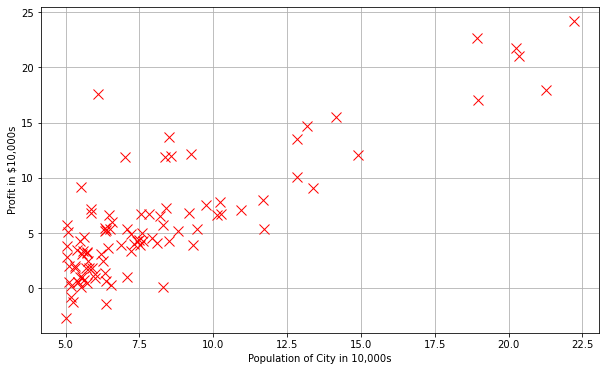

In [65]:
plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'rx',markersize=10)
plt.grid(True) 
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')

In [92]:
iterations = 1500
alpha = 0.01

In [104]:
def computeCost(theta,X,y):
    m = y.size
    cost = float((1./(2*m)) * np.dot((np.dot(X,theta)-y).T,(np.dot(X,theta)-y)))
    return cost

def descendGradient(X,y,theta_start = np.zeros(2)):
    """
    X is matrix with n- columns and m- rows
    y is a matrix with m- rows and 1 column
    theta is n- dimensional vector
    theta_start is an n- dimensional vector of initial theta guess
    """
    m = y.size 
    theta = theta_start
    jvec = [] 
    thetahistory = [] 
    for variable in range(iterations):
        tmp = theta
        cost = float((1./(2*m)) * np.dot((np.dot(X,theta)-y).T,(np.dot(X,theta)-y)))
        jvec.append(cost)
        thetahistory.append(list(theta[:,0]))
        for j in range(len(tmp)):
            tmp[j] = theta[j] - (alpha/m)*np.sum((np.dot(X,theta) - y)*np.array(X[:,j]).reshape(m,1))
        theta = tmp
    return theta, thetahistory, jvec

In [95]:
initial_theta = np.zeros((X.shape[1],1))
theta, thetahistory, jvec = descendGradient(X,y,initial_theta)

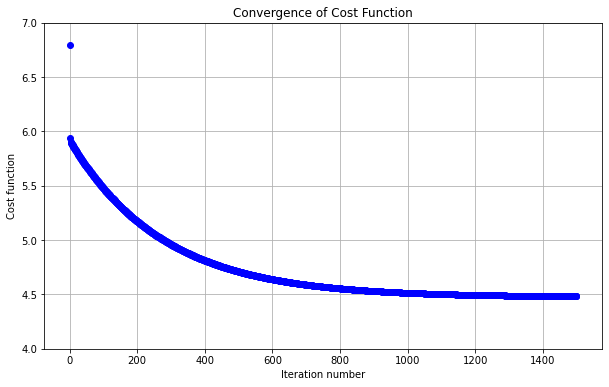

In [98]:
plt.figure(figsize=(10,6))
plt.plot(range(len(jvec)),jvec,'bo')
plt.grid(True)
plt.title("Convergence of Cost Function")    
plt.xlabel("Iteration number")
plt.ylabel("Cost function")
dummy = plt.xlim([-0.05*iterations,1.05*iterations])
dummy = plt.ylim([4,7])

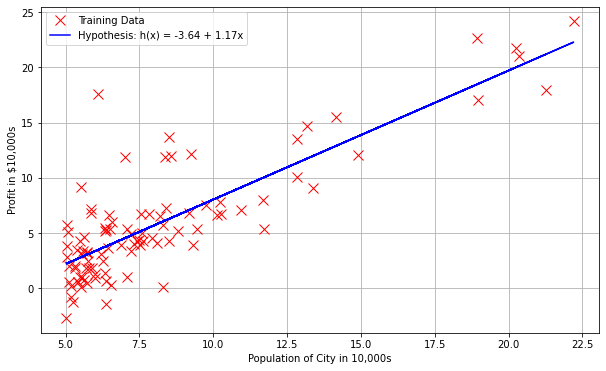

In [101]:
plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'rx',markersize=10,label='Training Data')
plt.plot(X[:,1], theta[0] + theta[1]*X[:,1],'b-',label = 'Hypothesis: h(x) = %0.2f + %0.2fx'%(theta[0],theta[1]))
plt.grid(True) 
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend()

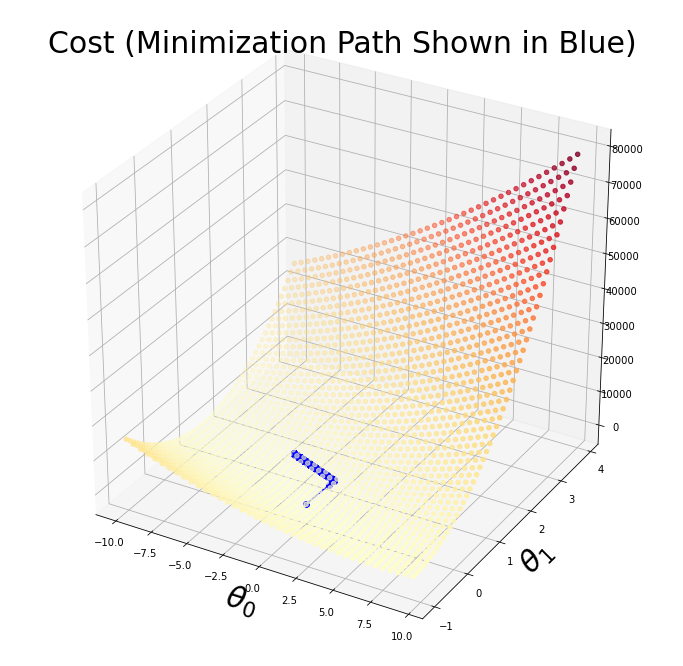

In [106]:
# visual J(θ)
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')
xvals = np.arange(-10,10,.5)
yvals = np.arange(-1,4,.1)
xs, ys, zs = [], [], []
for x in xvals:
    for y in yvals:
        xs.append(x)
        ys.append(y)
        zs.append(computeCost(np.array([[x], [y]]),X,y))

scat = ax.scatter(xs,ys,zs,c=np.abs(zs),cmap=plt.get_cmap('YlOrRd'))

plt.xlabel(r'$\theta_0$',fontsize=30)
plt.ylabel(r'$\theta_1$',fontsize=30)
plt.title('Cost (Minimization Path Shown in Blue)',fontsize=30)
plt.plot([x[0] for x in thetahistory],[x[1] for x in thetahistory],jvec,'bo-')
plt.show()


In [107]:
# Linear Regression with multiple variables
data = 'data/ex1data2.txt'
data = np.loadtxt(data,delimiter=',',usecols=(0,1,2),unpack=True) 
X = np.transpose(np.array(data[:-1]))
y = np.transpose(np.array(data[-1:]))
X = np.insert(X,0,1,axis=1)

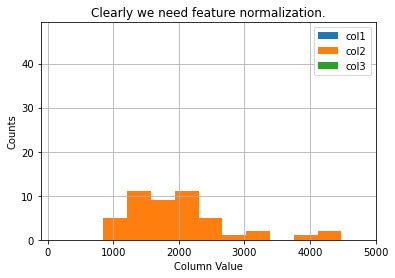

In [108]:
plt.grid(True)
plt.xlim([-100,5000])
dummy = plt.hist(X[:,0],label = 'col1')
dummy = plt.hist(X[:,1],label = 'col2')
dummy = plt.hist(X[:,2],label = 'col3')
plt.title('Clearly we need feature normalization.')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()

In [113]:
#Feature normalizing the columns (subtract mean, divide by standard deviation)
stored_feature_means, stored_feature_stds = [], []
Xnorm = X.copy()
for icol in range(Xnorm.shape[1]):
    stored_feature_means.append(np.mean(Xnorm[:,icol]))
    stored_feature_stds.append(np.std(Xnorm[:,icol]))
    if not icol: continue
    # not cpmpute first column
    Xnorm[:,icol] = (Xnorm[:,icol] - stored_feature_means[-1])/stored_feature_stds[-1]

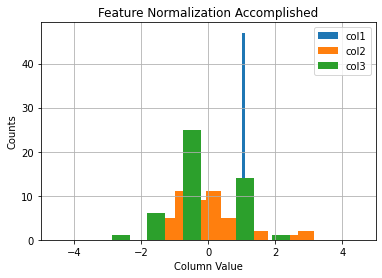

In [115]:
plt.grid(True)
plt.xlim([-5,5])
dummy = plt.hist(Xnorm[:,0],label = 'col1')
dummy = plt.hist(Xnorm[:,1],label = 'col2')
dummy = plt.hist(Xnorm[:,2],label = 'col3')
plt.title('Feature Normalization Accomplished')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()

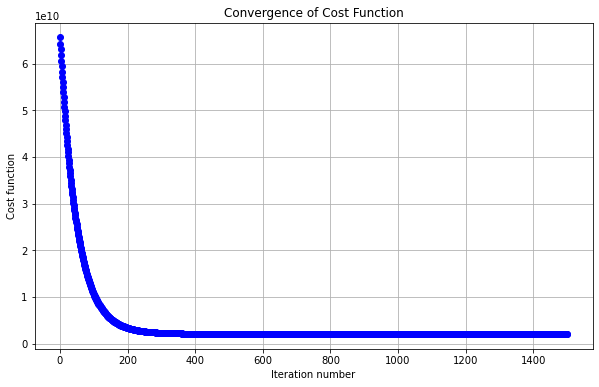

In [118]:
initial_theta = np.zeros((Xnorm.shape[1],1))
theta, thetahistory, jvec = descendGradient(Xnorm,y,initial_theta)

plt.figure(figsize=(10,6))
plt.plot(range(len(jvec)),jvec,'bo')
plt.grid(True)
plt.title("Convergence of Cost Function")    
plt.xlabel("Iteration number")
plt.ylabel("Cost function")
dummy = plt.xlim([-0.05*iterations,1.05*iterations])

In [119]:
from numpy.linalg import inv
#Implementation of normal equation to find analytic solution to linear regression
def normEqtn(X,y):
    return np.dot(np.dot(inv(np.dot(X.T,X)),X.T),y)

In [133]:
print("Prediction for price of house with 1650 square feet and 3 bedrooms")
print("$ %0.2f"%float(np.dot([1,1650.,3], normEqtn(X,y))))

Normal equation prediction for price of house with 1650 square feet and 3 bedrooms
$ 293081.46
